<a href="https://colab.research.google.com/github/SABArishbabu26/Student_Grade_Prediction/blob/main/Final_Student_Grade_Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS985: Machine Learning for Data Analytics Assignment** 
>**Task 2: Student Grade Prediction**

##**Summary**

><p align= "Justify">Education is a critical component for achieving long-term economic progress. In general, education tends to raise productivity and creativity and serve as the platform for entrepreneurship and technological breakthroughs, which boost the growth of any economy. Thus, being educated and getting good grades is paramount to individual development. This dataset describes the academic and personal characteristics of students and final grades. The objective of this task is to predict the Final Grade from the student information. This task is performed as a Supervised multiclass classification. We performed a standard machine learning model as a baseline model and ontained 0.82 performance in training and got a 0.56 score on the test dataset. Our dense deep neural network model received a Kaggle score of 0.96. This model is compared against a wide neural network and an Encoder-decoder Neural Network, and their performances are compared. This notebook also provides a critical analysis of each approach and recommendations for them.






# Dataset Analysis

## Dataset Description


><p align= "Justify">The dataset contains 20064 data points. The features in the dataset are school, sex, age, address, family size, parent's cohabitation status, mother's and father's education and job, students' guardian, travel time to school, study time, previous failures, school and family support. The dataset also contains if the student takes paid courses, participates in activities, attends nursery school and wants to go to college if they have access to the internet and the quality of family relationships and romantic relationships. The dataset also has information on the health status of the students, weekend and weekday alcohol consumption, is they have free time and go out with friends. The dataset has previous grades and final grades. This is demonstrated by the code below.







In [ ]:
#Import Necessary Packages
import os
import numpy as np
import pandas as pd
import sklearn

#Import Tensorflow and Keras
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


>>Necessary packages like pandas and NumPy are imported. And the TensorFlow and Keras libraries are imported and loaded.

In [ ]:
#Load the train dataset and display the number of datapoints in the dataset
data = pd.read_csv('train.csv')
data.count()

id            20064
school        20064
sex           20064
age           20064
address       20064
famsize       20064
Pstatus       20064
Medu          20064
Fedu          20064
Mjob          20064
Fjob          20064
reason        20064
guardian      20064
traveltime    20064
studytime     20064
failures      20064
schoolsup     20064
famsup        20064
paid          20064
activities    20064
nursery       20064
higher        20064
internet      20064
romantic      20064
famrel        20064
freetime      20064
goout         20064
Dalc          20064
Walc          20064
health        20064
absences      20064
G1            20064
G2            20064
Grade         20064
dtype: int64

>>The above code displays the attributes and the number of instances each attributes in the dataset. 

In [ ]:
#Display the first 5 rows in the training dataset
data.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,0,GP,F,16,U,GT3,A,0,3,teacher,...,5,4,2,1,0,4,2,8,13,7
1,1,MS,M,17,U,GT3,T,4,0,other,...,4,2,4,2,2,1,28,12,10,12
2,2,MS,F,17,U,LE3,T,1,0,services,...,4,4,2,1,2,2,3,11,9,8
3,3,GP,M,17,R,LE3,T,2,2,health,...,2,4,2,2,2,4,2,16,15,9
4,4,MS,F,14,R,LE3,T,0,1,health,...,3,3,2,2,1,4,0,9,14,8


>>The above code section helps us visualise the structure of the dataset.

In [ ]:
#Display the list of attributes and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20064 non-null  int64 
 1   school      20064 non-null  object
 2   sex         20064 non-null  object
 3   age         20064 non-null  int64 
 4   address     20064 non-null  object
 5   famsize     20064 non-null  object
 6   Pstatus     20064 non-null  object
 7   Medu        20064 non-null  int64 
 8   Fedu        20064 non-null  int64 
 9   Mjob        20064 non-null  object
 10  Fjob        20064 non-null  object
 11  reason      20064 non-null  object
 12  guardian    20064 non-null  object
 13  traveltime  20064 non-null  int64 
 14  studytime   20064 non-null  int64 
 15  failures    20064 non-null  int64 
 16  schoolsup   20064 non-null  object
 17  famsup      20064 non-null  object
 18  paid        20064 non-null  object
 19  activities  20064 non-null  object
 20  nurser

>>The above code section helps us view the overall information of the dataset like the attributes, number of instances of each attribute and its datatypes.

In [ ]:
#Find the mean and standard deviation of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20064.0,10031.500000,5792.122236,0.0,5015.75,10031.5,15047.25,20063.0
age,20064.0,15.649970,1.204188,14.0,15.00,16.0,16.00,21.0
Medu,20064.0,2.532197,1.128737,0.0,2.00,3.0,3.00,4.0
Fedu,20064.0,1.551585,1.036555,0.0,1.00,1.0,2.00,4.0
traveltime,20064.0,1.705891,1.117113,0.0,1.00,1.0,2.00,6.0
studytime,20064.0,1.541368,0.993014,0.0,1.00,1.0,2.00,5.0
failures,20064.0,0.134619,0.460545,0.0,0.00,0.0,0.00,4.0
famrel,20064.0,3.939593,0.871920,0.0,4.00,4.0,5.00,5.0
freetime,20064.0,2.850778,1.143260,0.0,2.00,3.0,4.00,5.0
goout,20064.0,2.174043,1.256756,0.0,1.00,2.0,3.00,5.0


>>The above code provides us with information like mean, standard deviation, and quartiles.

In [ ]:
#Display the count of unique grades
data["Grade"].value_counts()

9     10564
8      4857
10     1616
11     1133
7       746
13      456
14      310
6       229
12       80
5        47
18       19
17        5
16        2
Name: Grade, dtype: int64

>><p align= "Justify">The code above displays the grades distribution in the training dataset. We can observe that the dataset is imbalanced, where grade 9 is the grade obtained by the maximum number of students, and very few students have 16, 17, and 18 grades. 

## Histogram Distribution 

><p align= "Justify">The data is visualised using histogram distribution on the dataset. This helps us see how the information is distributed for the attributes like age, mother and father's education etc. 


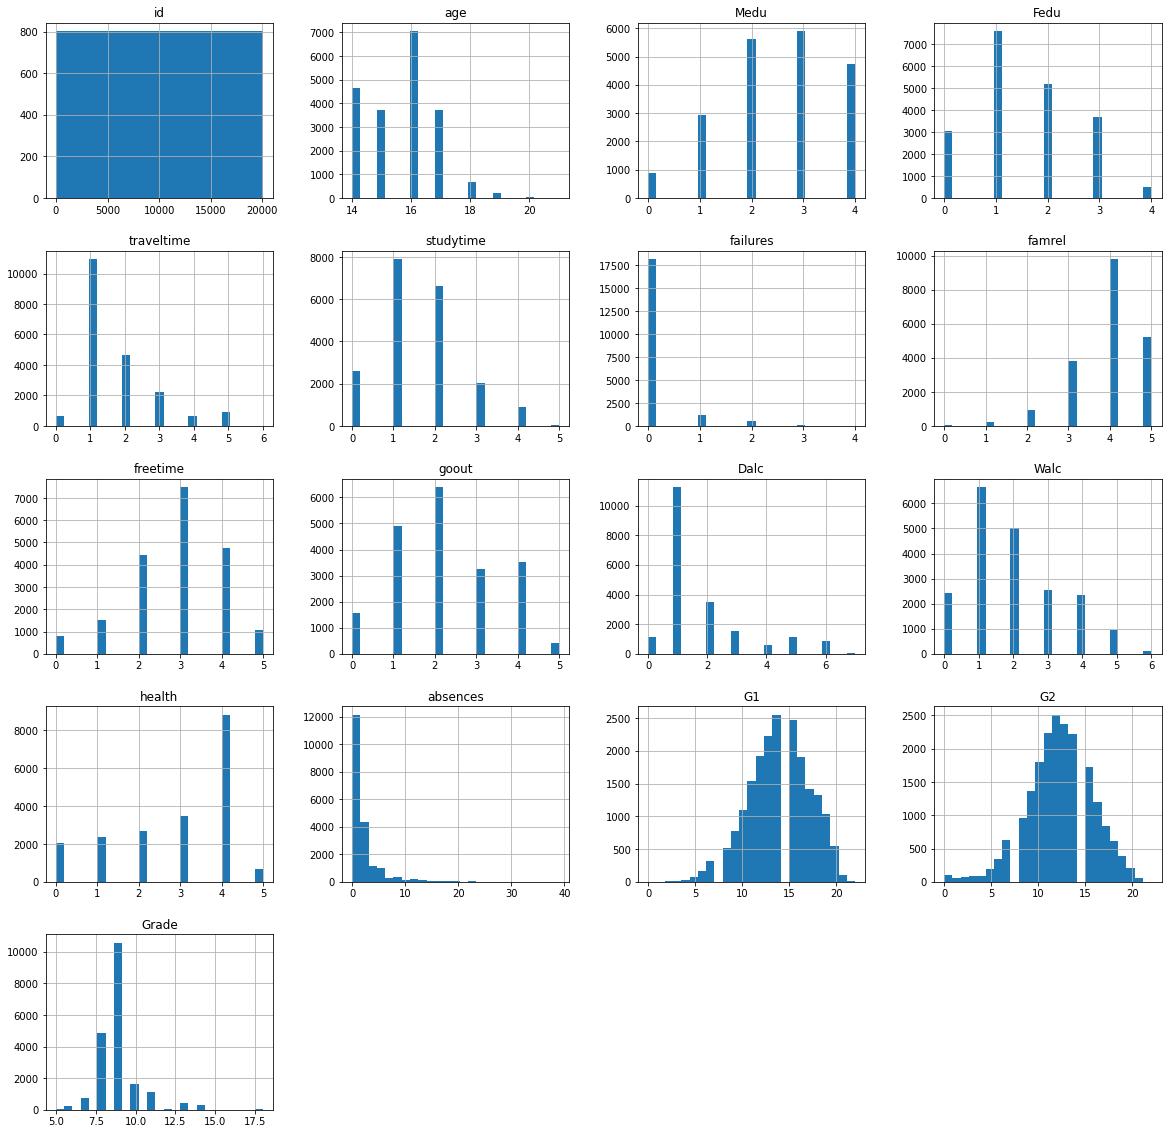

In [ ]:
#Frequency distribution of attributes in the dataset
import matplotlib.pyplot as plt
data.hist(bins=25, figsize=(20,20))
plt.show()

>>We can see that the distribution is heavily skewed to one side for most of the instances. This will be addressed by scaling later.

## Linear Correlation  

><p align= "Justify">The Linear Correlation Matrix demonstrates the correlation between the dataset's attributes. We can observe the linear correlation between all the features. This is visualised using a heat map. 






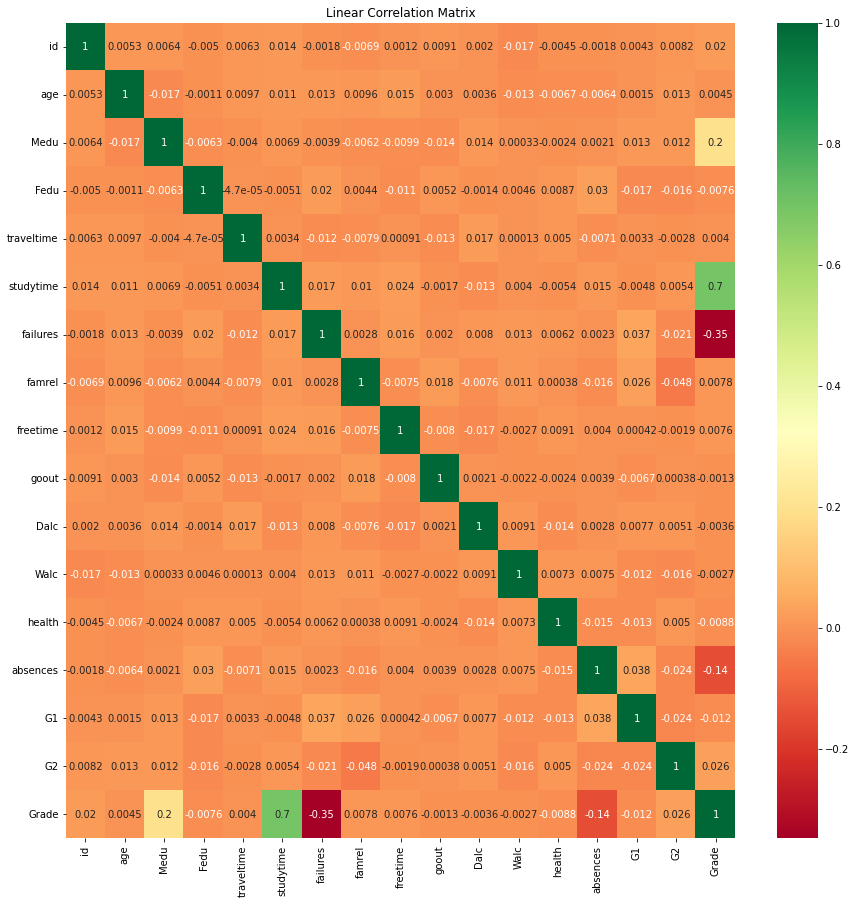

In [ ]:
#Display the linear Correlation Matrix
import seaborn as sns 
corrInx=data.corr()
top_corrInx=corrInx.index
plt.figure(figsize=(15,15))
plt.title('Linear Correlation Matrix')
sns.heatmap(data[top_corrInx].corr(), annot=True, cmap='RdYlGn')

>>Some of the observations from the box plot above are:


>>1.   Study time attribute is highly correlated with the final grade.
>>2.   Failures attribute is highly inverse correlated with the final grade.
>>3.   The rest of the attributes doesn’t correlate much with the target grade.

# Data Pre-processing

## Encoding the Dataset

><p align= "Justify">Most general deep learning models cannot take labels as input or give out labels as the output. Since some attributes like school, address, mother's job etc., have categorical data, these have to be encoded to use the neural network for training. This is performed using the pandas library's get_dummies function. We don't use the one-hot encoder function from the scikit library because it's a bit slow compared to the get_dummies method and does not have any significant advantage when training this dataset. 

><p align= "Justify">Label encoding is performed on the target grades so that the DNN models can classify them. The use of label encoding over one-hot encoding is due to lower complexity in execution while not producing a significant performance increase in this particular dataset.

In [ ]:
#select and display the attributes with object dataset
object_data = data.select_dtypes(include=['object']).copy()
object_data.head()

NameError: ignored

>>We can observe the list of attributes with categorical data and some of its labeled instances.

In [ ]:
#Find the unique object datatype attributes
array = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] 

for x in array:
    print(f"{x}: {data[x].unique()}")

>>We can observe attributes with categorical values along with the unique labels of those attribures. some attributes like activites, internet access, romantic relationships etc have labels 'yes, and 'no'. Mothers job and fathers job have labels like teacher, services, health, at home etc.

In [ ]:
#One-hot encode the object datatype attributes
data = pd.read_csv('train.csv')
array = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] 


for x in array:
  data = pd.get_dummies(data, columns=[x])

data.head()
  

>>The above code section performs one-hot encoding using pandas library’s get_dummies function and we can visualise the encoded dataset above.

In [ ]:
#List the datatypes of encoded training dataset
data.info()

>>We can observe that all atrributes are of datatype integer avove.

In [ ]:
#Encode 'Grade' using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Grade'] = le.fit_transform(data['Grade'])
data.head(10)

>>The target attribute to be predicted "Grade" is label encode using the label encoder form scikit learn package. The grades in the 5-18 are encoded to 0-13 labels. these labels are used while performing multi-class classification.

## Outlier Removal

><p align= "Justify">Analysing data include investigating the data behaviour. In machine learning, the are so-called outliers defined as the set of data deviating from the rest of the dataset. These are often considered as values that decrease the statical efficiency of the dataset. Usually, outliers manifest due to human error when registering the data or randomly because of unexpected irregularity intrinsic to the dataset. So it is worth identifying and removing them when necessary, especially outliers caused by human mistakes (Grubbs, 1969).

><p align= "Justify">The method below involves the z-score from the standard normal distribution with mean 0 and variance 1. This will identify outliers from their distance to the mean per the threshold. The method found  541 outliers. 

In [ ]:
#Here the programm try to look further in the data to identify outlier following what was plotted earlier

from scipy import stats    #importaing a additional function called stats from the library SciPy to manage statistics such as probability distributions, summary and frequency statistics, correlation functions.

def get_outlier_counts(dataset, threshold):     #threshold here is the limit of acceptable data being no outliers
  
  dataset = data.copy()    #copying of the dataframe


#z-score method with mean 0 and variance 1, per the threshold (ATKIN, 2022).

  threshold_z_score = stats.norm.ppf(threshold)      # getting the z-score (coordinate on axis x) and passing on the treshold into the ppf (percent point function) methdod to use percentage values

  z_score_df = pd.DataFrame(np.abs(stats.zscore(dataset)), columns=dataset.columns)     #getting a z-scrore for every value in the dataset in restpect to their columns either positve or negative 

  return (z_score_df > threshold_z_score).sum(axis=0)   

>>The code block defines the get_outlier_function that identifies the outliers in each attribute.

In [ ]:
#identify the number of outliers of each attributes
get_outlier_counts(data.drop(columns=['id','Grade']),0.9999)

id                     0
age                    5
Medu                   0
Fedu                   0
traveltime            11
studytime              0
failures             679
famrel                30
freetime               0
goout                  0
Dalc                   0
Walc                   0
health                 0
absences             292
G1                     3
G2                     0
Grade                336
school_GP              0
school_MS              0
sex_F                  0
sex_M                  0
address_R              0
address_U              0
famsize_GT3            0
famsize_LE3            0
Pstatus_A              0
Pstatus_T              0
Mjob_at_home           0
Mjob_health            0
Mjob_other             0
Mjob_services          0
Mjob_teacher           0
Fjob_at_home           0
Fjob_health            0
Fjob_other             0
Fjob_services          0
Fjob_teacher           0
reason_course          0
reason_home            0
reason_other           0


>>We can observe the number of outliers that are present in each attribute.

In [ ]:
#what is the best threshold ? here instead of counting the outliers as above, the program will get the oulier indeces to identify the threshold to use

def remove_outliers(dataset, threshold):
  
  dataset = data.copy()

#getting the z-score of each value
  threshold_z_score = stats.norm.ppf(threshold)   

  z_score_df = pd.DataFrame(np.abs(stats.zscore(dataset)), columns=dataset.columns)
  z_score_df = z_score_df > threshold_z_score

#getting the outliers indices
  outliers =  z_score_df.sum(axis=1)    #summing up the outliers accross the rows on the axis 1
  outliers = outliers > 0               #for each given outlier, drop the row if there is at least 1 outlier in that row
  outlier_indices = dataset.index[outliers]

  dataset = dataset.drop(outlier_indices, axis = 0).reset_index(drop=True)     #from the dataset exclude the outlier and return the new dataset from the axis 0 and reset the index to avoing missing indeces

  return dataset

>>Remove outliers function takes in threshold and the training dataset and returns the dataset after performing outlier removal.

In [ ]:
#Remove outliers from the training dataset
data = remove_outliers(data.drop(columns=['Grade']), 0.99999)
#Display the number of datapoints after removing outliers.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 19613 non-null  int64
 1   age                19613 non-null  int64
 2   Medu               19613 non-null  int64
 3   Fedu               19613 non-null  int64
 4   traveltime         19613 non-null  int64
 5   studytime          19613 non-null  int64
 6   failures           19613 non-null  int64
 7   famrel             19613 non-null  int64
 8   freetime           19613 non-null  int64
 9   goout              19613 non-null  int64
 10  Dalc               19613 non-null  int64
 11  Walc               19613 non-null  int64
 12  health             19613 non-null  int64
 13  absences           19613 non-null  int64
 14  G1                 19613 non-null  int64
 15  G2                 19613 non-null  int64
 16  Grade              19613 non-null  int64
 17  school_GP   

>>We can observe the final number of instances of data to be 19613 from the initial number of instances 20064. 541 instances are removed from the training dataset.

## Scaling and Sampling the Data

><p align= "Justify">Scaling is performed on the dataset to reduce the distance between its instances are lowered and are uniform. This step also improves the model performance while training. 

><p align= "Justify">The dataset is then oversampled using Random Oversampler because the dataset is wildly imbalanced with the target instances. This process increases the likelihood of the minority instances being sampled. Thus producing a better prediction on the test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Prepare the Data
X = data.drop(columns=['Grade'])
Y = data['Grade']

#Scale the training dataset
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X))

#Over sample the imbalanced dataset.
from imblearn.over_sampling import RandomOverSampler 
sample = RandomOverSampler(random_state=42)
X, Y = sample.fit_resample(x_scaled, Y)



# Machine Learning Model

## Random Forest Classifier

><p align= "Justify">Random forest model is used to perform the standard machine learning baseline classification. Random forest is a classification function that uses multiple decision trees architecture to break a dataset into a smaller subset or trees for prediction using the bagging sampling method (Chudhey et al., 2022). Random Forest was used as the standard machine learning baseline because it works best when used for classification, specially multiclass classification. Random forest is the ensemble of Decision tree classifiers trained via bagging. The model works based on the feature importance approach, and the features which are highly correlated with the target will have a higher portion of weight in predicting the data. The random forest also reduces the overfitting of the data, thus leading to a better prediction with the highest accuracy. For effective results, Random Forest needs its parameters well-tuned according to the task. In this case, it uses 100 estimators for its prediction and the max depth parameter is set to 5 after performing hyperparameter tuning using the trial and error method.

In [ ]:
# split the existing sample data and fit it to training data for find RMSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Define a function train_model for training
def train_model(model, x, y):
  x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, random_state=100, test_size=0.30)
  x_trainset.shape, x_testset.shape
  model.fit(x_trainset,y_trainset)
  pred = model.predict(x_testset)
  print("Accuracy Score :", accuracy_score(y_testset,pred)*100)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 50)

#Train the model using random forest classifier
train_model(rf_model,X,Y)

#Feature Importance
feature_importances = rf_model.feature_importances_
print("Feature importances:\n{}".format(feature_importances))

Accuracy Score : 82.2251815212911
Feature importances:
[0.00804045 0.00784113 0.0942727  0.02131086 0.01043291 0.24870897
 0.20280025 0.0034909  0.017881   0.02444273 0.0171216  0.00310823
 0.02000954 0.07767786 0.01843722 0.02662018 0.00129515 0.00275111
 0.00170631 0.00065952 0.00154544 0.00134237 0.00160294 0.00173858
 0.00029522 0.00051772 0.00160685 0.00090451 0.01297471 0.00109756
 0.00321537 0.00225268 0.00033243 0.00129114 0.00215597 0.0027272
 0.00076978 0.00100994 0.00038418 0.00074917 0.00074299 0.00773672
 0.0008522  0.00250387 0.00475134 0.00196468 0.00252294 0.00105207
 0.00104092 0.00221498 0.00299762 0.00078471 0.00102018 0.0601069
 0.04433552 0.00444846 0.00274535 0.004871   0.00618516]


>><p align= "Justify">The random forest model produces a training accuracy score of 82.225%, and when the test dataset is predicted using the model and the predictions uploaded to kaggle produces a kaggle score of 0.5655. We can also visualise the valuable features using a random forest classifier using the feature_importance parameter. This function shows that failures and study time are essential attributes, and access to the internet is the least important attribute.

# Dense Deep Neural Network

><p align= "Justify">A sequential model is a Deep Learning model organised in a layer by layer architecture where the previous layer is connected to the following. This architecture makes it possible to define the input layer that will encounter the shape of the training set of data and add it to the model piecewise as the rest of all the layers.


## Model Description 

><p align= "Justify">The model contains an input layer, an output layer and three hidden layers. A dropout layer accompanies each hidden layer. The input layer includes 128 neurons, and the hidden layer 1 has 64 neurons, hidden layer 2 has 32 neurons, and hidden layer 3 has 32 neurons. The output has 13 neurons, each corresponding to 13 distinct classes of grades from 5-to 18 present in the training dataset. The model consists of 18765 parameters to be trained. The output layer is set to softmax to perform multiclass classification. Each neuron returns the probability distribution of that neuron, and the highest probability is classified. 

The hyperparameters that were tuned for this model were:

* Activation
* Kernal Initialiser
* Regulariser parameter
* Dropout rate
* Optimiser
* Loss function

><p align= "Justify">The hyperparameter tuning is performed in the upcoming cell, and this is done by mounting the model in the function tune model and performing a grid search. 

><p align= "Justify">The hidden layers use the relu activation function because it does not activate all neurons and therefore is faster to compute while keeping the accuracy high. We trained the model using other activations like sigmoid and tanh, but relu consistently performed better. For weight initialisation, we used several methods like random normal, he normal, lecun normal and glorot normal. Random normal was the parameter that produced the best accuracy when tuning the model. However, random normal is not the ideal initialisation because the random initialisation of the weights and biases may produce inconsistent results. A dropout layer follows each hidden layer. The dropout is introduced to modify the network while training instead of changing the optimiser or loss function. The dropout layer has a parameter dropout rate. This decides what per cent of neurons are dropped while training. This model also performs regularisation in the hidden layers to stop the weights from getting too large. The model uses L2 regularisation, which changes the consequences proportional to weights. The regularisation parameter is hyperparameter tuned, and lamda of 0.01 produced the best performance.

><p align= "Justify">Sparse categorical cross-entropy is used for loss function in this model. Although categorical cross-entropy is used for multiclass classification, the target attribute "Grade" is label encoded instead of one-hot encoding sparse categorical entropy. The Adam Optimiser function is used in this model after it produced the best accuracy while performing hyperparameter tuning. This could be because the weights are invariable to the changing gradient, and it is much faster and less computationally expensive. We tested the model using other optimisers like rmsprop, sgd, adagrad and adadelta, but adam produced much better accuracy while training. The metric used for loss calculation is accuracy. Though accuracy is not ideal for an imbalanced dataset like the one we have, it performed well enough for this particular dataset. The ideal learning rate is 0.0001 






In [ ]:
#Import the necessary packages for the deep neural network model
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.losses import sparse_categorical_crossentropy

#Assign regulaizer and dropout parameters
reg_l2 = keras.regularizers.l2(l=0.01)
dr = 0.0

#The dense neural network model 
dense_model = keras.models.Sequential([
 keras.layers.Dense(128, input_dim=59),
 keras.layers.Dropout((dr)),
 keras.layers.Dense(64,activation="relu", kernel_initializer="random_normal",kernel_regularizer=reg_l2),
 keras.layers.Dropout((dr)),
 keras.layers.Dense(32,activation="relu", kernel_initializer="random_normal",kernel_regularizer=reg_l2),
 keras.layers.Dropout((dr)),
 keras.layers.Dense(16,activation="relu", kernel_initializer="random_normal",kernel_regularizer=reg_l2),
 keras.layers.Dropout((dr)),
 keras.layers.Dense(13, activation="softmax")                                
])

#Compile the deep neural network with loss function, optimiser and metrics for backpropagation 
dense_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics= ['accuracy'])

#Print the model summary
print(dense_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7680      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

>><p align= "Justify">We declared the model and printed the model summary. We can visualise the dense layers, the number of neurons of each layer and the total number of parameters of the model.

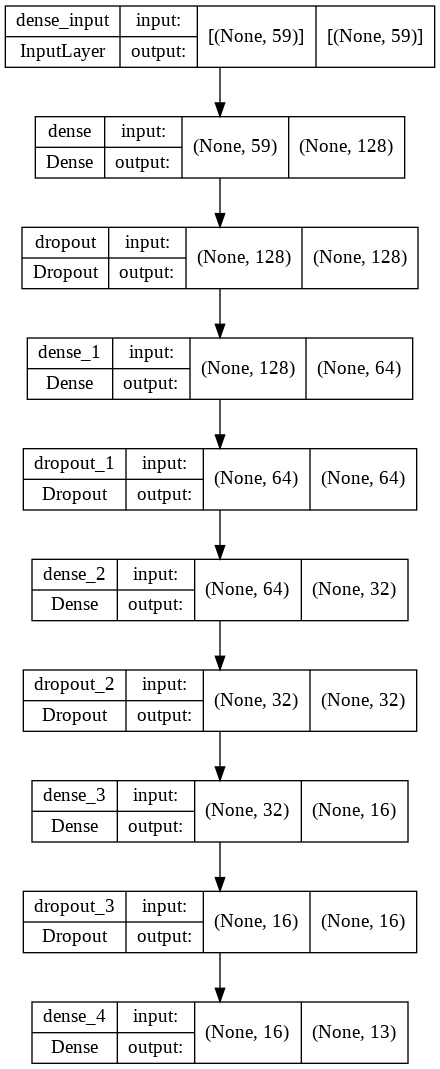

In [ ]:
#Display the dense neural netowork as a plot
from tensorflow.keras.utils import plot_model
plot_model(dense_model,show_shapes=True)

>>We can visualise the model using the plot_model function

## Training and Validating 

><p align= "Justify">The test and train split size used here is 70% training set and 30% testing set size. This was the best test/train split we found after testing 90/10, 80/20 and 60/40. The batch size used for training is 256. This is deduced after performing hyperparameters tuning with smaller and larger batch sizes. The smaller batch sizes led to overfitting, and the larger batch sizes generalised the training dataset leading to poor performance.

><p align= "Justify">The model is run with the test and train sets for 50 epochs. At 50 Epochs, the model saturated and stopped learning. This was deduced using the hyperparameter tuning done below.

In [ ]:
#split the training and testing data
X_train_full, X_test, y_train_full, y_test = train_test_split(X,Y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=128, test_size=0.30)

#Fit the testing and training data to the deep neural network model
history = dense_model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_valid, y_valid))


Epoch 1/50
216/216 [==============================] - 2s 5ms/step - loss: 1.5218 - accuracy: 0.5489 - val_loss: 0.8249 - val_accuracy: 0.7756
Epoch 2/50
216/216 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.9121 - val_loss: 0.4858 - val_accuracy: 0.9527
Epoch 3/50
216/216 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.9610 - val_loss: 0.4044 - val_accuracy: 0.9658
Epoch 4/50
216/216 [==============================] - 1s 4ms/step - loss: 0.3777 - accuracy: 0.9668 - val_loss: 0.3674 - val_accuracy: 0.9666
Epoch 5/50
216/216 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.9702 - val_loss: 0.3283 - val_accuracy: 0.9694
Epoch 6/50
216/216 [==============================] - 1s 4ms/step - loss: 0.3191 - accuracy: 0.9728 - val_loss: 0.3071 - val_accuracy: 0.9706
Epoch 7/50
216/216 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.9742 - val_loss: 0.2921 - val_accuracy: 0.9772
Epoch 

>>The dense deep neural network is trained using the training dataset which was already preprocessed to produce better results.

## Model Analysis and Evaluation

><p align= "Justify">The loss and the accuracy of the predictions from the test set of the training data are calculated using the evaluate function. The accuracy score is printed below. The training accuracy is 0.991, and the loss is 0.103.

In [ ]:
#Evalute the accuracy of the trained model
accuracy_test = dense_model.evaluate(X_test, y_test)
print(accuracy_test)

822/822 [==============================] - 1s 2ms/step - loss: 0.1323 - accuracy: 0.9792
[0.13233190774917603, 0.979188084602356]


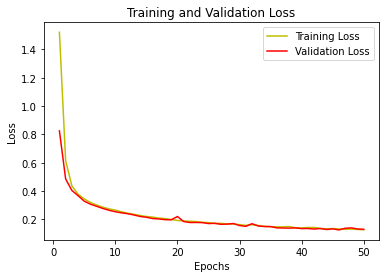

In [ ]:
# Plot the training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

>>The training loss and validation loss are plotted above. we can observe that they are similar. Therefore, there is no over fitting.  

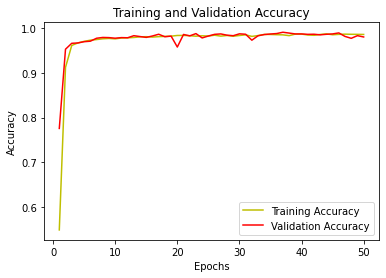

In [ ]:
# Plot the training accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

>>The training accuracy and validation accuracy are plotted above. we can observe that they are similar. Therefore, there is no over fitting. 

## Hyper Parameter Tuning

><p align= "Justify">Hyper parameter tuning is pertinent to any machine learning model. Ignoring this step would lead us to suboptimal results and maximum loss, leading to more predictions errors. We performed hyperparameter tuning on dropout rate, regularisation parameter, batch size, epochs, kernel initialiser and activation using the grid search function from scikit learn.


In [ ]:
#Hyper-parameters tuning 
#Import necessary packages
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Create a function tune_model for hyperparameter tuning
def tune_model(l = 0.0,dropout_rate = 0.0,activation="sgd", kernel_initializer="random_normal"):
  reg_l2 = keras.regularizers.l2(l)
  model = Sequential()
  model.add(Dense(128,  input_dim=59))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(64,activation=activation, kernel_initializer=kernel_initializer,kernel_regularizer=reg_l2))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(32,activation=activation, kernel_initializer=kernel_initializer,kernel_regularizer=reg_l2))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(16,activation=activation, kernel_initializer=kernel_initializer,kernel_regularizer=reg_l2))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(13, activation="softmax"))                               
  

  #Compile the deep neural network with loss function, optimiser and metrics for backpropagation 
  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

  return model


# create a classifier model
model = KerasClassifier(build_fn=tune_model,epochs=epochs,verbose=1)

# define the parameters for performing grid search
batch_size = [32,64, 128, 256, 512, 1024]
dropout_rate = [ 0, 0.01, 0.05, 0.1, 0.2, 0.5]
l = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
activation = ['sgd','tanh','relu']
kernel_initializer = ['random_normal','he_normal','lecun_normal','glorot_normal']
epochs = [10,25,50,75,100]
parameter_grid= dict(dropout_rate=dropout_rate,l=l,batch_size=batch_size,activation=activation, kernel_initializer=kernel_initializer,epochs=epochs)

#Define input parameters for the grid search function
grid = GridSearchCV(estimator=model, param_grid= parameter_grid, n_jobs=-1, cv=3)

#Fit the classifier with testing and training dataset.
#Note: The below statements takes minutes to run therefore if necessary uncomment the statement and run the cell
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell')


Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


>>Note:The hyper parameter tuning takes several minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell


## Prediction

><p align= "Justify">The final prediction using the test dataset is done below, and grades are written to the test data file. This is submitted on kaggle to obtain our score. This is discussed in the results and discussion section of this notebook.

In [ ]:
#Predict the Testset using the trained deep neural network

# Load the test file
test = pd.read_csv("test.csv")

#Copy the test file and perform onehot encoding for the test dataset attributes
test_copy = pd.read_csv('test.csv')
array = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] 

for x in array:
  test_copy = pd.get_dummies(test_copy, columns=[x])

#Import the necessary packages for scaling the test dataset
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
test_scaled = std_scaler.fit_transform(test_copy) # fit the test_copy

#Predict the grades of the students in the test dataset.
pred = dense_model.predict(test_scaled) 
df = pd.DataFrame(pred)
test['Grade'] = df.idxmax(axis = 1)+5

#Print the predicted grades
print(test['Grade'])

# load the final predicted pop into original test file
#Note: The below statement is commented so that the code can run multiple times without the need to load the test dataset again 
#test.to_csv("test.csv") 




0       9
1       9
2       9
3       9
4       9
       ..
96      9
97      7
98      9
99     10
100    10
Name: Grade, Length: 101, dtype: int64


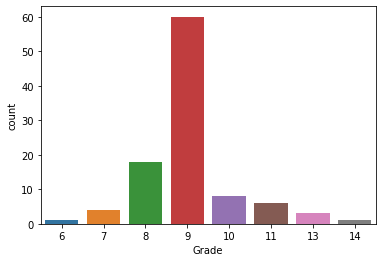

In [ ]:
#Plot the predicted grades of the test dataset
sns.countplot(x="Grade", data=test)

>><p align= "Justify">We can observe the predictions of the test set by the dense, deep learning model. We can see that the 9 has the most predictions. This is because the training dataset has the most instances of grade 9. we can also see other grade predictions in the plot above.

# Wide Neural Network

><p align= "Justify">Some of the critical advantages of a neural network is that it can be scaled to fit the problem it works to answer. This model investigates the output difference between a deep neural network and a wide neural network. Even if deep and wide networks give similar results, they behave quite differently, with errors and variances (Thao Nguyen,2010).

## Model Description 


><p align= "Justify">The model contains an input layer, an output layer and hidden layers. The input layer consists of 500 neurons. The hidden layer also has 500 neurons. The output layer has 13 neurons, each corresponding to 13 distinct classes of grades from 5-to 18 present in the training dataset. The model consists of 287000 parameters to be trained. The output layer is set to softmax to perform multiclass classification. Each neuron returns the probability distribution of that neuron, and the highest probability is classified. 

The hyperparameters that were tuned for this model were:

* Activation
* Regulariser parameter
* Optimiser
* Loss function

><p align= "Justify">The hyperparameter tuning is performed in the upcoming cell, and this is done by mounting the model in the function tune model and performing a grid search. 

><p align= "Justify">The hidden layers use the relu activation function because it does not activate all neurons and therefore is faster to compute while keeping the accuracy high. We trained the model using other activations like sigmoid and tanh, but relu consistently performed better. The model doesn’t include any initialiser or dropout since they further contributed to overfitting. This model also performs regularisation in the hidden layers to stop the weights from getting too large. The model uses L2 regularisation, which changes the weights proportional to weights. The regularisation parameter is hyperparameter tuned, and lamda of 0.01 produced the best performance.

><p align= "Justify">Sparse categorical cross-entropy is used for loss function in this model. Although categorical cross-entropy is used for multiclass classification, the target attribute "Grade" is label encoded instead of one-hot encoding sparse categorical entropy. The Adam Optimiser function is used in this model after it produced the best accuracy while performing hyperparameter tuning. This could be because the weights are invariable to the changing gradient, and it is much faster and less computationally expensive. We tested the model using other optimisers like rmsprop, sgd, adagrad and adadelta, but adam produced much better accuracy while training. The metric used for loss calculation is accuracy. Though accuracy is not ideal for an imbalanced dataset like the one we have, it performed well enough for this particular dataset. The ideal learning rate is 0.0001 





In [ ]:
#Import the necessary packages for the Wide neural network model
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import sparse_categorical_crossentropy

#Assign regulaizer and dropout parameters
reg_l2 = keras.regularizers.l2(l=0.0)


#The wide neural network model 
wide_model = keras.models.Sequential([
 keras.layers.Dense(500,  input_dim=59),
 keras.layers.Dense(500,activation="relu",kernel_regularizer=reg_l2),
 keras.layers.Dense(13, activation="softmax")                                
])

#Compile the wide neural network with loss function, optimiser and metrics for backpropagation 
wide_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

#Print the model summary
print(wide_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               30000     
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 13)                6513      
                                                                 
Total params: 287,013
Trainable params: 287,013
Non-trainable params: 0
_________________________________________________________________
None


>>We declared the model and printed the model summary. We can visualise the dense layers, number of neurons of each layer and thr total number of parameters of the model.

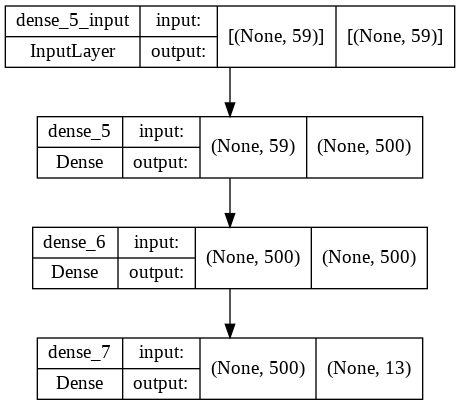

In [ ]:
#Display the dense neural netowork as a plot
from tensorflow.keras.utils import plot_model
plot_model(wide_model,show_shapes=True)

>>We can visualise the model using the plot_model function

## Training and Validating 

><p align= "Justify">The test and train split size used here is 70% training set and 30% testing set size. This was the best test/train split we found after testing 90/10, 80/20 and 60/40. The batch size used for training is 1024. This is deduced after performing hyperparameters tuning with smaller and larger batch sizes. The smaller batch sizes led to overfitting, and the larger batch sizes generalised the training dataset leading to poor performance.

><p align= "Justify">The model is run with the test and train sets for 50 epochs. At 50 Epochs, the model saturated and stopped learning. This was deduced using the hyperparameter tuning done below.

In [ ]:
#Fit the testing and training data to the wide neural network model
history = wide_model.fit(X_train, y_train, epochs=50, batch_size= 1024, validation_data=(X_valid, y_valid))



Epoch 1/50
54/54 [==============================] - 3s 54ms/step - loss: 0.8078 - accuracy: 0.7586 - val_loss: 0.3397 - val_accuracy: 0.9344
Epoch 2/50
54/54 [==============================] - 3s 50ms/step - loss: 0.2152 - accuracy: 0.9602 - val_loss: 0.1357 - val_accuracy: 0.9760
Epoch 3/50
54/54 [==============================] - 3s 49ms/step - loss: 0.0976 - accuracy: 0.9828 - val_loss: 0.0758 - val_accuracy: 0.9848
Epoch 4/50
54/54 [==============================] - 3s 51ms/step - loss: 0.0576 - accuracy: 0.9897 - val_loss: 0.0493 - val_accuracy: 0.9896
Epoch 5/50
54/54 [==============================] - 3s 49ms/step - loss: 0.0390 - accuracy: 0.9930 - val_loss: 0.0384 - val_accuracy: 0.9910
Epoch 6/50
54/54 [==============================] - 3s 55ms/step - loss: 0.0291 - accuracy: 0.9941 - val_loss: 0.0315 - val_accuracy: 0.9921
Epoch 7/50
54/54 [==============================] - 3s 48ms/step - loss: 0.0223 - accuracy: 0.9962 - val_loss: 0.0263 - val_accuracy: 0.9926
Epoch 8/50
54

>>The dense wide neural network is trained using the training dataset which was already preprocessed to produce better results.

## Model Analysis and Evaluation

>The loss and the accuracy of the predictions from the test set of the training data are calculated using the evaluate function. The accuracy score is printed below. The training accuracy is 0.982, and the loss is 0.121.

In [ ]:
#Evalute the accuracy of the trained model
accuracy_test = wide_model.evaluate(X_test, y_test)
print(accuracy_test)


822/822 [==============================] - 2s 2ms/step - loss: 0.0119 - accuracy: 0.9957
[0.011886833235621452, 0.9957006573677063]


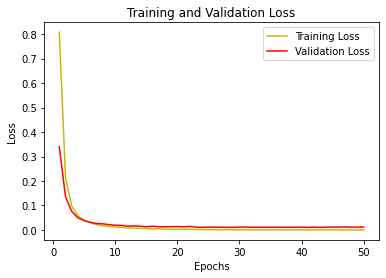

In [ ]:
# Plot the training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

>>The training loss and validation loss are plotted above. we can ovbserve that they are almost similar. But the curve is  smmoth, therefore there is no over fitting.  

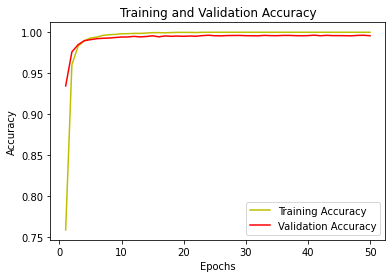

In [ ]:
# Plot the training accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

>>The training accuracy and validation accuracy are plotted above. we can observe that they are almost similar. But the curve is  smooth, therefore there is no over fitting. 

## Hyper Parameter Tuning

><p align= "Justify">Hyper parameter tuning is pertinent to any machine learning model. Ignoring this step would lead us to suboptimal results and maximum loss, leading to more predictions errors. We performed hyperparameter tuning on dropout rate, regularisation parameter, batch size, epochs and activation using the grid search function from scikit learn.

In [ ]:
#Hyper-parameters tuning 
#Import necessary packages

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier


# Create a function tune_model for hyperparameter tuning
def tune_model(l = 0.0,dropout_rate = 0.0, activation="relu"):
  reg_l2 = keras.regularizers.l2(l)
  model = Sequential()
  model.add(Dense(500,  input_dim=59))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(500,activation=activation,kernel_regularizer=reg_l2))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(13, activation="softmax"))                               
  
  #Compile the deep neural network with loss function, optimiser and metrics for backpropagation
  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

  return model

# create a classifier model
model = KerasClassifier(build_fn=tune_model,epochs=epochs,verbose=1)

# define the parameters for performing grid search
batch_size = [32,64, 128, 256, 512, 1024]
dropout_rate = [ 0, 0.01, 0.05, 0.1, 0.2, 0.5]
l = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
activation = ['sgd','tanh','relu']
epochs = [10,25,50,75,100]
parameter_grid= dict(dropout_rate=dropout_rate,l=l,batch_size=batch_size,activation=activation,epochs=epochs)


#Define input parameters for the grid search function
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)


#Note: The below statements takes minutes to run therefore if necessary uncomment the statement and run the cell

#Fit the classifier with testing and training dataset.
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell')



Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


>>Note:The hyper parameters tuning takes several minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell



## Prediction

><p align= "Justify">The final prediction using the test dataset is done below, and grades are written to the test data file. This is submitted on kaggle to obtain our score. This is discussed in the results and discussion section of this notebook.

In [ ]:
#Predict the Testset using the trained deep neural network

# Load the test file
test = pd.read_csv("test.csv")

#Copy the test file and perform onehot encoding for the test dataset attributes
test_copy = pd.read_csv('test.csv')
array = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] 

for x in array:
  test_copy = pd.get_dummies(test_copy, columns=[x])

#Import the necessary packages for scaling the test dataset
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
test_scaled = std_scaler.fit_transform(test_copy) # fit the test_copy

#Predict the grades of the students in the test dataset.
pred = wide_model.predict(test_scaled) 
df = pd.DataFrame(pred)
test['Grade'] = df.idxmax(axis = 1)+5

#Print the predicted grades
print(test['Grade'])

# load the final predicted pop into original test file
#Note: The below statement is commented so that the code can run multiple times without the need to load the test dataset again 
#test.to_csv("test.csv") 



0       9
1       9
2       9
3       9
4       9
       ..
96      9
97      7
98      9
99     10
100    10
Name: Grade, Length: 101, dtype: int64


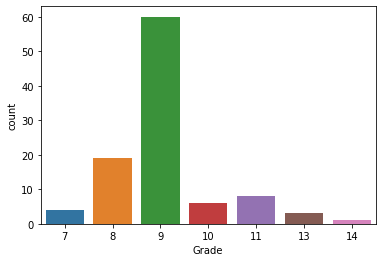

In [ ]:
#Plot the predicted grades of the test dataset
sns.countplot(x="Grade", data=test)

>>We can observe the predictions of the test set by the dense Wide neural network model. We can see that the 9 has the most predictions. This is because the training dataset has the most instances of grade 9. we can also see other grade predictions in the plot above.

# Encoder-Decoder Model

><p align= "Justify">The Encoder-Decoder model is designed to act like autoencoders models. This architecture consists of an encoder at the input and a decoder at the output. The data is reconstructed to fewer nodes and deconstructed back to the output. Although the implementation does not use autoencoders since we don't have an unlabeled dataset which autoencoders work best for. The dense neural network designed below should behave like an autoencoder. 

## Model Description 

><p align= "Justify">The model contains an encoder and a decoder. The encoder is placed at the input with 32 neurons and two hidden layers with 16 and 8 neurons. The decoder part has two hidden layers with 6 and 16 neurons, and the output layer has 20 neurons, each corresponding to grades from 0-to 20. The model consists of 3140 parameters to be trained. The output layer is set to softmax to perform multiclass classification. Each neuron returns the probability distribution of that neuron, and the highest probability is classified. 

The hyperparameters that were tuned for this model were:

* Activation
* Dropout Rate
* Optimiser
* Loss function


><p align= "Justify">The hyperparameter tuning is performed in the upcoming cell, and this is done by mounting the model in the function tune model and performing a grid search. The hidden layers use the relu activation function because it does not activate all neurons and therefore is faster to compute while keeping the accuracy high. We trained the model using other activations like sigmoid and tanh, but relu consistently performed better. The dropout is introduced to modify the network while teaching instead of changing the optimiser or loss function. The dropout layer has a parameter dropout rate. This decides what per cent of neurons are dropped while training.

><p align= "Justify">Sparse categorical cross-entropy is used for loss function in this model. Although categorical cross-entropy is used for multiclass classification, the target attribute "Grade" is label encoded instead of one-hot encoding sparse categorical entropy. The Adam Optimiser function is used in this model after it produced the best accuracy while performing hyperparameter tuning. This could be because the weights are invariable to the changing gradient, and it is much faster and less computationally expensive. We tested the model using other optimisers like rmsprop, sgd, adagrad and adadelta, but adam produced much better accuracy while training. The metric used for loss calculation is accuracy. Though accuracy is not ideal for an imbalanced dataset like the one we have, it performed well enough for this particular dataset. The ideal learning rate is 0.0001 





In [ ]:

#Import the necessary packages for the Encoder-Decoder model
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.losses import sparse_categorical_crossentropy


#Assign the dropout rate
dr = 0.1


#the Multi Layer Perceptron network model
Ed_model = keras.models.Sequential([
    #Encoder                                 
    keras.layers.Dense(32, input_dim=59),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout((dr)),
    #Decoder
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(20, activation="softmax")
])

#Compile the wide neural network with loss function, optimiser and metrics for backpropagation 
Ed_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

 
#Print the model summary
print(Ed_model.summary())



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                1920      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 20)               

>>We declared the model and printed the model summary. We can visualise the dense layers, number of nuerons of each layer and thr total number of parameters of the model.

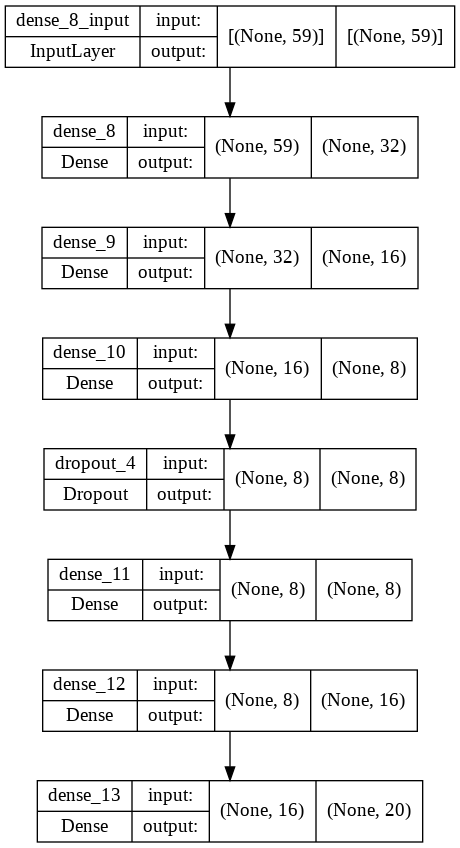

In [ ]:
#Display the dense neural netowork as a plot
from tensorflow.keras.utils import plot_model
plot_model(Ed_model,show_shapes=True)

>>We can visualise the model using the plot_model function

## Training and Validating 

><p align= "Justify">The test and train split size used here is 70% training set and 30% testing set size. This was the best test/train split we found after testing 90/10, 80/20 and 60/40. The batch size used for training is 512. This is deduced after performing hyperparameters tuning with smaller and larger batch sizes. The smaller batch sizes led to overfitting, and the larger batch sizes generalised the training dataset leading to poor performance.

><p align= "Justify">The model is run with the test and train sets for 50 epochs. At 50 Epochs, the model saturated and stopped learning. This was deduced using the hyperparameter tuning done below.



In [ ]:
#Fit the testing and training data to the deep neural network model
history = Ed_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_valid, y_valid))


Epoch 1/50
108/108 [==============================] - 1s 6ms/step - loss: 2.4728 - accuracy: 0.1548 - val_loss: 1.8614 - val_accuracy: 0.3144
Epoch 2/50
108/108 [==============================] - 0s 4ms/step - loss: 1.5076 - accuracy: 0.4086 - val_loss: 1.1042 - val_accuracy: 0.5495
Epoch 3/50
108/108 [==============================] - 0s 4ms/step - loss: 1.0431 - accuracy: 0.5729 - val_loss: 0.7633 - val_accuracy: 0.7268
Epoch 4/50
108/108 [==============================] - 0s 4ms/step - loss: 0.7822 - accuracy: 0.6944 - val_loss: 0.5312 - val_accuracy: 0.8467
Epoch 5/50
108/108 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.7708 - val_loss: 0.3884 - val_accuracy: 0.9025
Epoch 6/50
108/108 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.8230 - val_loss: 0.2742 - val_accuracy: 0.9406
Epoch 7/50
108/108 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8548 - val_loss: 0.2062 - val_accuracy: 0.9572
Epoch 

>>The dense encoder-decoder neural network is trained using the training dataset which was already preprocessed to produce better results.

## Model Analysis and Evaluation

><p align= "Justify">The loss and the accuracy of the predictions from the test set of the training data are calculated using the evaluate function. The accuracy score is printed below. The training accuracy is 0.991, and the loss is 0.028.

In [ ]:

accuracy_test = Ed_model.evaluate(X_test, y_test)
print(accuracy_test)




822/822 [==============================] - 1s 1ms/step - loss: 0.0334 - accuracy: 0.9933
[0.03336071968078613, 0.9933416843414307]


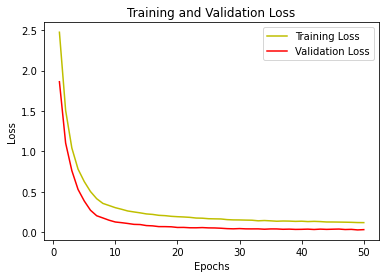

In [ ]:
# Plot the training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

>>The training loss and validation loss are plotted above. we can ovbserve that they are similar. Therefore, there is no over fitting.  

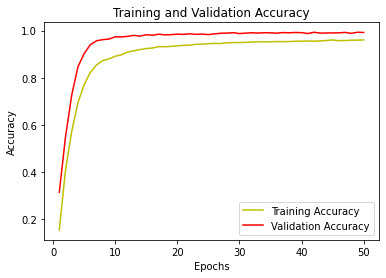

In [ ]:
# Plot the training accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

>>The training accuracy and validation accuracy are plotted above. we can ovbserve that they are almost similar. Therefore, there is no over fitting.  

## Hyper Parameter Tuning

><p align= "Justify">Hyper parameter tuning is pertinent to any machine learning model. Ignoring this step would lead us to suboptimal results and maximum loss, leading to more predictions errors. We performed hyperparameter tuning on dropout rate, batch size, epochs and activation using the grid search function from scikit learn.

In [ ]:
#Hyper-parameters tuning 

#Import necessary packages
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier


# Create a function tune_model for hyperparameter tuning
def tune_model(dropout_rate = 0.0,activation='sgd' ):
  model = Sequential()
  #Encoder
  model.add(Dense(32,  input_dim=59))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(16, activation=activation))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(8, activation=activation))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(8, activation=activation))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(16, activation=activation))
  model.add(Dropout((dropout_rate)))
  model.add(Dense(20, activation="softmax"))                               
  
  #Compile the encoder-decoder neural network with loss function, optimiser and metrics for backpropagation
  model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

  return model


# create a classifier model
model = KerasClassifier(build_fn=tune_model,epochs=epochs,verbose=1)

# define the parameters for performing grid search
batch_size = [32,64, 128, 256, 512, 1024]
dropout_rate = [ 0, 0.01, 0.05, 0.1, 0.2, 0.5]
activation = ['sgd','tanh','relu']
epochs = [10,25,50,75,100]
parameter_grid= dict(dropout_rate=dropout_rate,batch_size=batch_size,activation=activation,epochs=epochs)

#Define input parameters for the grid search function
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)

#Note: The below statements takes several minutes to run therefore if necessary uncomment the statement and run the cell

#Fit the classifier with testing and training dataset.
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell')

Note:The hyper parameter tuning takes minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


>>Note:The hyper parameter tuning takes several minutes to run so it has been commented in this code cell. if you want to verify, uncomment the statement and run the cell


## Prediction

><p align= "Justify">The final prediction using the test dataset is done below, and grades are written to the test data file. This is submitted on kaggle to obtain our score. This is discussed in the results and discussion section of this notebook.

In [ ]:
#Predict the Testset using the trained deep neural network

# Load the test file
test = pd.read_csv("test.csv")

#Copy the test file and perform onehot encoding for the test dataset attributes
test_copy = pd.read_csv('test.csv')
array = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] 

for x in array:
  test_copy = pd.get_dummies(test_copy, columns=[x])

#Import the necessary packages for scaling the test dataset
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
test_scaled = std_scaler.fit_transform(test_copy) # fit the test_copy

#Predict the grades of the students in the test dataset.
pred = Ed_model.predict(test_scaled) 
df = pd.DataFrame(pred)
test['Grade'] = df.idxmax(axis = 1)+5

#Print the predicted grades
print(test['Grade'])

# load the final predicted pop into original test file
#Note: The below statement is commented so that the code can run multiple times without the need to load the test dataset again 
#test.to_csv("test.csv") 



0       9
1       9
2       9
3       9
4       9
       ..
96      9
97      7
98      9
99     10
100    10
Name: Grade, Length: 101, dtype: int64


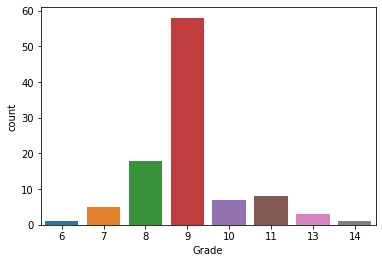

In [ ]:
#Plot the predicted grades of the test dataset
sns.countplot(x="Grade", data=test)

>>We can observe the predictions of the test set by the dense, deep learning model. We can see that the 9 has the most predictions. This is because the training dataset has the most instances of grade 9. we can also see other grade predictions in the plot above.

# Results and Discussion
><p align= "Justify">For this multiclass classification task, the deep learning models used here are a dense deep neural network with adam optimiser and relu activation, a wide neural network and an encoder-decoder neural network. All the network parameters are tuned by performing hyperparameters tuning using grid search. The final parameters set for the respective models produce the best training accuracy with minimal loss and avoid the problem of overfitting. The data preprocessing includes encoding the categorical data, outliers removal and scaling and sampling the dataset. The hyperparameters tuning is performed using grid search and returns the best parameters for each model. The performance metric used here for training is accuracy, even though it's not the optimal metric for accuracy. We can use the F1 score or AUC as it handles the error better than accuracy.




|Architecture|Loss|Training Accuracy| Kaggle Score|
|------------|----|-----------------|-------------|
|Random Forest|0.678|0.823|0.56|
|Dense Deep Neural Network|0.112|0.991|0.96|
|Wide Neural Network|0.012|0.996|0.87|
|Encoder-Decoder Network|0.02|0.994|0.92|

><p align= "Justify">The table above demonstrates the training accuracy, loss and the Kaggle score of the best configuration of each neural network model. The Kaggle calculates the F1 score of the predictions. This looks for good precision and recalls score. The standard machine learning model performs decently on the training but produces a suboptimal Kaggle score. This was an expected outcome because the deep learning model can be tuned better to prof=duce better results even with a large dataset. The dense deep neural network works well after performing scaling and oversampling of the minority classes. The regularisation parameter and initialiser helped reduce the overfitting problem and improve the kaggle prediction score. The wide neural network does not perform better than the deep neural network model and slightly overfits the data. This is reflected on the kaggle score as well. The encoder-decoder model performs on par with the deep neural network, but the kaggle score is slightly lower. The encoder-decoder model also predicts the most number of classes among all these models. This could mean that it is better equipped when scaled for bigger size datasets. 

# Conclusion

><p align= "Justify">Finally, recommend that the dense deep model be used for this student grade prediction To improve the model we can use one-hot encoding for the target feature "Grade" and use categorical cross entropy as it makes better predictions than label encoding the target feature and sparse categorical crossentropy. We performed all the task requirements successfully and gained deeper understanding on deep learning models. 

# References



1. ATKIN, G., 2022. 🎧 Spotify Song Popularity Prediction (Outliers). [online] Kaggle.com. Available at: https://www.kaggle.com/code/gcdatkin/spotify-song-popularity-prediction-outliers/notebook [Accessed 26 March 2022].


2. GRUBBS, F. E. 1969. Procedures for Detecting Outlying Observations in Samples. Technometrics, 11, 1-21.

3. GÉRON, A. 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, @OReillyMedia.

4. Google Cloud. 2022. Overview of hyperparameter tuning | AI Platform Training | Google Cloud. [online] Available at: https://cloud.google.com/ai-platform/training/docs/hyperparameter-tuning-overview [Accessed 10 April 2022].

5. KACHOUIE, N. N. & DEEBANI, W. 2020. Association Factor for Identifying Linear and Nonlinear Correlations in Noisy Conditions. ENTROPY-SWITZ, 22, 440.

6. Nguyen, T., Raghu, M. and Kornblith, S., 2020. Do wide and deep networks learn the same things? uncovering how neural network representations vary with width and depth. arXiv preprint arXiv:2010.15327.

7. https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

8. Aly, M., 2005. Survey on multiclass classification methods. Neural Netw, 19(1-9), p.2.

9. Huang, G.B., Zhou, H., Ding, X. and Zhang, R., 2011. Extreme learning machine for regression and multiclass classification. IEEE Transactions on Systems, Man, and Cybernetics, Part B (Cybernetics), 42(2), pp.513-529.

10. Iqbal, Z., Qadir, J., Mian, A.N. and Kamiran, F., 2017. Machine learning based student grade prediction: A case study. arXiv preprint arXiv:1708.08744.
